In [1]:
import pandas
import configparser
import psycopg2 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host=host,
                        user=user,
                        password=pwd,
                        dbname=db)

# Q.1

In [6]:
sql = "select * from student"

In [7]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_16569/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s3@jmu.edu,s3,ISAT
2,s4@jmu.edu,s4,ISAT
3,s2@jmu.edu,s2,IA
4,s5@jmu.edu,s5,IA


# Q.2

In [10]:
sql = """
select professor.p_name,course.c_name
from professor
inner join course
on professor.p_email=course.p_email"""

In [11]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_16569/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_name,c_name
0,p2,mongodb
1,p3,postgresql
2,p3,twitter
3,p3,facebook


# Q.3

In [14]:
sql = """select c_number,count(*) as num_students
from enroll
group by c_number
"""

/tmp/ipykernel_16569/2570793977.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='c_number'>

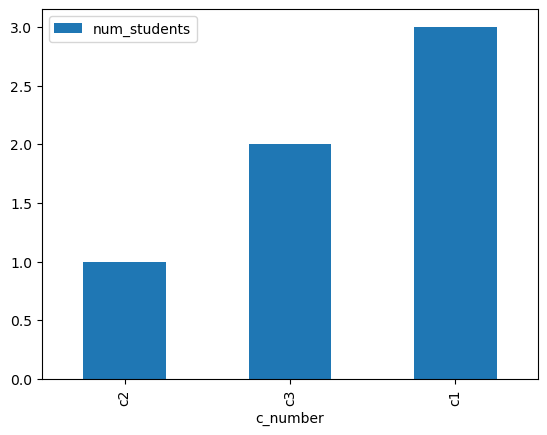

In [15]:
df = pandas.read_sql_query(sql, conn)
df.plot.bar(y= 'num_students', x= 'c_number')

# Q.4

In [24]:
sql = """select professor.p_name, count(course.c_number) as num_courses_taught
from professor
inner join course on professor.p_email=course.p_email
group by professor.p_name
order by num_courses_taught desc
"""

/tmp/ipykernel_16569/560043635.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='p_name'>

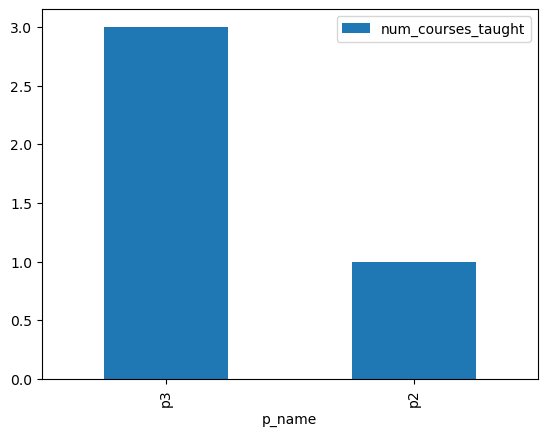

In [25]:
df = pandas.read_sql_query(sql, conn)
df.plot.bar(y= 'num_courses_taught', x= 'p_name')

# Q.5

In [36]:
cur = conn.cursor()

In [37]:
sql = """insert into professor(p_email,p_name,office)
values ('p4@jmu.edu','p4','o4')"""



In [38]:
cur.execute(sql) 

In [39]:
conn.commit()

In [41]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_16569/385041841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [42]:
cur = conn.cursor()

In [51]:
sql ="""insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','r2','p4@jmu.edu')"""


In [52]:
cur.execute(sql) 

In [50]:
conn.rollback()

In [53]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_16569/4028193866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c4,facebook,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


# Q.6 

In [54]:
#cur = conn.cursor()

In [ ]:
#sql = """update course 
set p_email= 'p3@jmu.edu'
where p_email = 'p1@jmu.edu'

delete from professor
where p_email= 'p1@jmu.edu'"""